#                                Manipulation de fichiers GRIB


On peut récuperer les fichiers GRIB depuis le lien suivant: [blue_text](https://donneespubliques.meteofrance.fr/?fond=produit&id_produit=130&id_rubrique=51)


Nous avons 4 choix à réaliser avant d'obtenir notre fichier téléchargé:

- Domaine: Choix entre 

"0,1° sur l'Europe" pour l'Europe, modèle précis mais uniquement pour une latitude comprise entre [37.5,55.5] et une longitude comprise entre [-12,16] avec une résolution de 0.1° (Maille de 1.3 km)

"0,5° sur le monde" pour le monde, modèle moins précis avecune résolution de 0.5° (Maille de 5km)


- Sous paquet: Permet de choisir le type de paramètres que l'on veut ainsi que les altitudes (proche ou loin du sol).

-




In [1]:
import matplotlib.pyplot as plt 
import os
import datetime
from datetime import timedelta
import numpy as np
import pandas as pd 
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [2]:
import pyproj
import pygrib


Pour télécharger le fichier directement selon ce que l'on cherche

In [3]:
import webbrowser
now = datetime.datetime.now()

model = "ARPEGE"
resolution = "0.5"
paquet = "HP1"
temps_debut = "00H"
temps_fin = "24H"
reference_time = now.strftime("%Y-%m-%d")
reference_hour = "12"

webbrowser.open("https://donneespubliques.meteofrance.fr/?fond=donnee_libre&token=__5yLVTdr-sGeHoPitnFc7TZ6MhBcJxuSsoZp6y0leVHU__&model={}&format=grib2&grid={}&grid2=0.1&package={}&time={}{}&referencetime={}T{}%3A00%3A00Z".
               format(model,resolution,paquet,temps_debut,temps_fin,reference_time,reference_hour))

True

In [4]:
def getDateMessage(grb):
    return datetime.datetime(grb["year"],
                                       grb["month"], 
                                       grb["day"],
                                       grb["hour"],
                                       grb["minute"],
                                       grb["second"]) + timedelta(hours=grb["forecastTime"])
    

In [6]:
file_and_path_2 = 'C:\\Users\\33658\\Downloads\\W_fr-meteofrance,MODEL,AROME+001+HP1+00H_C_LFPW_202011051200--.grib2'   
file_and_path ='C:\\Users\\33658\\Downloads\\W_fr-meteofrance,MODEL,ARPEGE+05+SP1+27H48H_C_LFPW_202011121200--.grib2'


grbs = pygrib.open(file_and_path)
grb = grbs[1]
print("Résumé du message: " + str(grb) + "\n")
for key in sorted(grb.keys()):
    try:
        print("valeur de la Key {}: {} \n".format(key,str(grb[str(key)])))
    except:
        pass



Résumé du message: 1:Mean sea level pressure:Pa (instant):regular_ll:meanSea:level 0:fcst time 27 hrs:from 202011121200

valeur de la Key GRIBEditionNumber: 2 

valeur de la Key NV: 0 

valeur de la Key Ni: 720 

valeur de la Key Nj: 361 

valeur de la Key PLPresent: 0 

valeur de la Key PVPresent: 0 

valeur de la Key alternativeRowScanning: 0 

valeur de la Key angleDivisor: 1000000 

valeur de la Key angleMultiplier: 1 

valeur de la Key angleSubdivisions: 1000000 

valeur de la Key average: 100692.87093336412 

valeur de la Key backgroundProcess: 255 

valeur de la Key basicAngleOfTheInitialProductionDomain: 0 

valeur de la Key binaryScaleFactor: 1 

valeur de la Key bitMapIndicator: 255 

valeur de la Key bitmapPresent: 0 

valeur de la Key bitsPerValue: 12 

valeur de la Key bottomLevel: 0 

valeur de la Key centre: lfpw 

valeur de la Key centreDescription: French Weather Service - Toulouse 

valeur de la Key cfName: air_pressure_at_mean_sea_level 

valeur de la Key cfNameECMF:

In [7]:
grbs = pygrib.open(file_and_path)
grbs1 = pygrib.open(file_and_path_2)
reference_datetime = datetime.datetime(grbs[1]["year"],
                                       grbs[1]["month"], 
                                       grbs[1]["day"],
                                       grbs[1]["hour"],
                                       grbs[1]["minute"],
                                       grbs[1]["second"])
reference_datetime_1 = datetime.datetime(grbs1[1]["year"],
                                       grbs1[1]["month"], 
                                       grbs1[1]["day"],
                                       grbs1[1]["hour"],
                                       grbs1[1]["minute"],
                                       grbs1[1]["second"])

In [8]:
L = []
R = []
Z = []
grbs = pygrib.open(file_and_path)
for grb in grbs:  
    L.append(grb["parameterName"])
    R.append(reference_datetime + timedelta(hours=grb["forecastTime"]))
    Z.append(grb["level"])

L = sorted(list(set(L)))
R = sorted(list(set(R)))
Z = sorted(list(set(Z)))
print("Nombre de messages:" , grbs.messages)
print("\n")
print("Nom des paramètres: {}".format(L))
print("\n")
print("Dates: {}".format(R))
print("\n")
print("Altitudes (en m) : {}".format(Z))

Nombre de messages: 112


Nom des paramètres: ['Downward short-wave radiation flux', 'Pressure', 'Relative humidity', 'Snow melt', 'Temperature', 'Total cloud cover', 'Total precipitation rate', 'Wind direction (from which blowing)', 'Wind speed', 'Wind speed (gust)', 'u-component of wind', 'u-component of wind (gust)', 'v-component of wind', 'v-component of wind (gust)']


Dates: [datetime.datetime(2020, 11, 12, 12, 0), datetime.datetime(2020, 11, 13, 15, 0), datetime.datetime(2020, 11, 13, 18, 0), datetime.datetime(2020, 11, 13, 21, 0), datetime.datetime(2020, 11, 14, 0, 0), datetime.datetime(2020, 11, 14, 3, 0), datetime.datetime(2020, 11, 14, 6, 0), datetime.datetime(2020, 11, 14, 9, 0), datetime.datetime(2020, 11, 14, 12, 0)]


Altitudes (en m) : [0, 2, 10]


In [9]:
grbs = pygrib.open(file_and_path)

for grb in grbs:
    print (grb)
    



1:Mean sea level pressure:Pa (instant):regular_ll:meanSea:level 0:fcst time 27 hrs:from 202011121200
2:Mean sea level pressure:Pa (instant):regular_ll:meanSea:level 0:fcst time 30 hrs:from 202011121200
3:Mean sea level pressure:Pa (instant):regular_ll:meanSea:level 0:fcst time 33 hrs:from 202011121200
4:Mean sea level pressure:Pa (instant):regular_ll:meanSea:level 0:fcst time 36 hrs:from 202011121200
5:Mean sea level pressure:Pa (instant):regular_ll:meanSea:level 0:fcst time 39 hrs:from 202011121200
6:Mean sea level pressure:Pa (instant):regular_ll:meanSea:level 0:fcst time 42 hrs:from 202011121200
7:Mean sea level pressure:Pa (instant):regular_ll:meanSea:level 0:fcst time 45 hrs:from 202011121200
8:Mean sea level pressure:Pa (instant):regular_ll:meanSea:level 0:fcst time 48 hrs:from 202011121200
9:10 metre U wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 10 m:fcst time 27 hrs:from 202011121200
10:10 metre U wind component:m s**-1 (instant):regular_ll:heightAboveGr

In [10]:
def chosen_param(file ,chosen_datetime = reference_datetime,param = 'Wind speed',level = 10 ):
    for grb in file:
        if (grb["parameterName"] == str(param) and getDateMessage(grb) == chosen_datetime and grb["level"] == int(level)) :
            return grb
    print("The messsage does not exist")
    return
grbs = pygrib.open(file_and_path)
grb = chosen_param(grbs,chosen_datetime = datetime.datetime(2020, 11, 13, 15, 0) ,
                   level = 10)
print(grb)

33:10 metre wind speed:m s**-1 (instant):regular_ll:heightAboveGround:level 10 m:fcst time 27 hrs:from 202011121200


In [11]:

grbs1 = pygrib.open(file_and_path_2)

for grb1 in grbs1:
    print (grb1)
    

1:Relative humidity:% (instant):regular_ll:heightAboveGround:level 20 m:fcst time 0 hrs:from 202011051200
2:Relative humidity:% (instant):regular_ll:heightAboveGround:level 50 m:fcst time 0 hrs:from 202011051200
3:Relative humidity:% (instant):regular_ll:heightAboveGround:level 100 m:fcst time 0 hrs:from 202011051200
4:U component of wind:m s**-1 (instant):regular_ll:heightAboveGround:level 20 m:fcst time 0 hrs:from 202011051200
5:U component of wind:m s**-1 (instant):regular_ll:heightAboveGround:level 50 m:fcst time 0 hrs:from 202011051200
6:100 metre U wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 100 m:fcst time 0 hrs:from 202011051200
7:V component of wind:m s**-1 (instant):regular_ll:heightAboveGround:level 20 m:fcst time 0 hrs:from 202011051200
8:V component of wind:m s**-1 (instant):regular_ll:heightAboveGround:level 50 m:fcst time 0 hrs:from 202011051200
9:100 metre V wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 100 m:fcst time 0 hrs

In [12]:
grbs1 = pygrib.open(file_and_path_2)
grb1 = chosen_param(grbs1,chosen_datetime = datetime.datetime(2020, 11, 5, 12, 0) ,
                   level = 20 , param = 'u-component of wind')
grb1

4:U component of wind:m s**-1 (instant):regular_ll:heightAboveGround:level 20 m:fcst time 0 hrs:from 202011051200

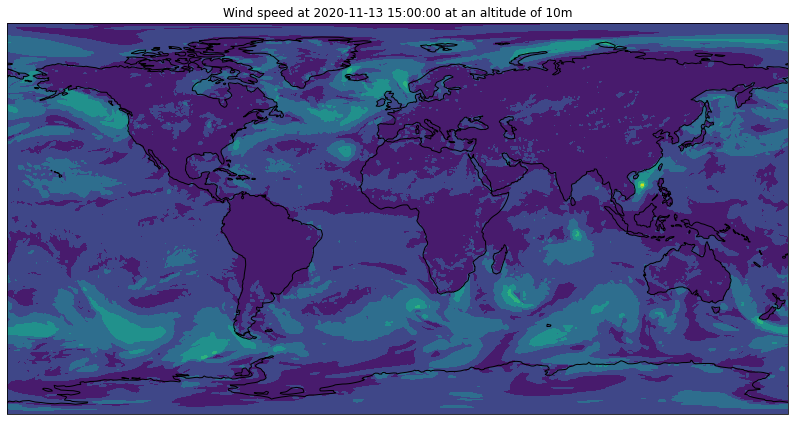

In [13]:

lats , lons = grb.latlons()

data_crs = ccrs.PlateCarree()

fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

  
ax.set_global()

ax.stock_img()
ax.coastlines()

ax.title.set_text("{} at {} at an altitude of {}m".format(grb["parameterName"],getDateMessage(grb),grb["level"]))
ax.contourf(lons,lats,grb.values,transform = data_crs)


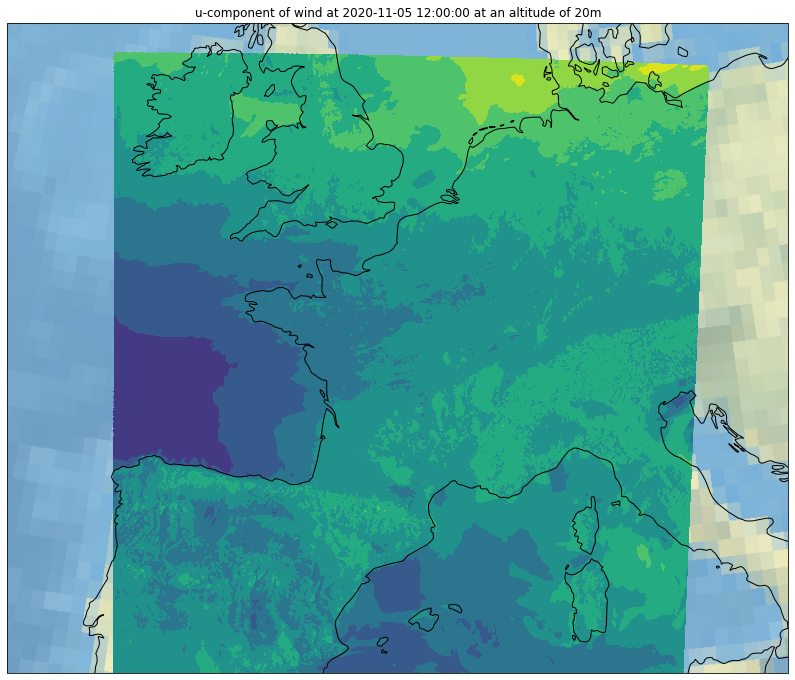

In [14]:

lats , lons = grb1.latlons()

map_crs = ccrs.LambertConformal(central_longitude = 4,
                               central_latitude = 46.5)

data_crs = ccrs.PlateCarree()

fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(1, 1, 1, projection=map_crs)
ax.set_extent([-12,16,37.5,55.5],data_crs)
  

ax.stock_img()
ax.coastlines()


ax.title.set_text("{} at {} at an altitude of {}m".format(grb1["parameterName"],getDateMessage(grb1),grb1["level"]))
ax.contourf(lons,lats,grb1.values,transform = data_crs)